## Import useful libraries and retrieve the dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

from tensorflow import keras

2022-08-19 11:08:56.335143: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Parameters

batch_size    = 64
epochs        = 5
scale         = 1
fit_verbosity = 1

In [3]:
def shuffle_np_dataset(x, y):
    
    assert (len(x) == len(y)), "x and y must have same size"
    p = np.random.permutation(len(x))
    return x[p], y[p]


def read_dataset(enhanced_dir, dataset_name):
   
    # Read dataset
    filename = f'{enhanced_dir}/{dataset_name}.h5'
    with  h5py.File(filename,'r') as f:
        x_train = f['x_train'][:]
        y_train = f['y_train'][:]
        x_test  = f['x_test'][:]
        y_test  = f['y_test'][:]
        x_meta  = f['x_meta'][:]
        y_meta  = f['y_meta'][:]
    print(x_train.shape, y_train.shape)
    

    # done
    print(f'Dataset "{dataset_name}" is loaded.')
    return x_train,y_train, x_test,y_test, x_meta,y_meta

# Read dataset

enhanced_dir = 'Data/enhanced'

dataset_name  = 'set-24x24-L'

x_train,y_train,x_test,y_test, x_meta,y_meta = read_dataset(enhanced_dir, dataset_name)

(7841, 24, 24, 1) (7841,)
Dataset "set-24x24-L" is loaded.


In [4]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)

x_train :  (7841, 24, 24, 1)
y_train :  (7841,)
x_test  :  (2526, 24, 24, 1)
y_test  :  (2526,)


Train set


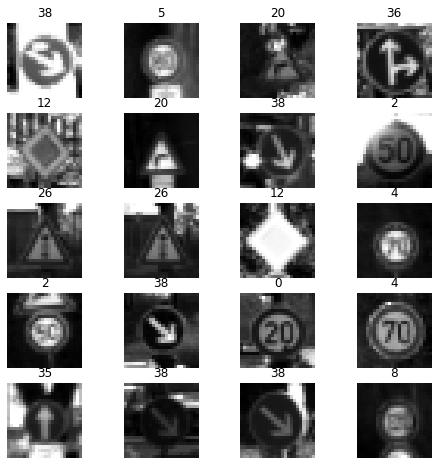

In [5]:
# a look to the data

fig = plt.figure(figsize=(8, 8)) 
columns = 4
rows = 5
print("Train set")
for i in range(1,columns*rows+1): 
    fig.add_subplot(rows, columns, i) 
    plt.imshow(x_train[i-1], cmap='gray')
    plt.title(y_train[i-1])
    plt.axis('off')
plt.show()

Test set


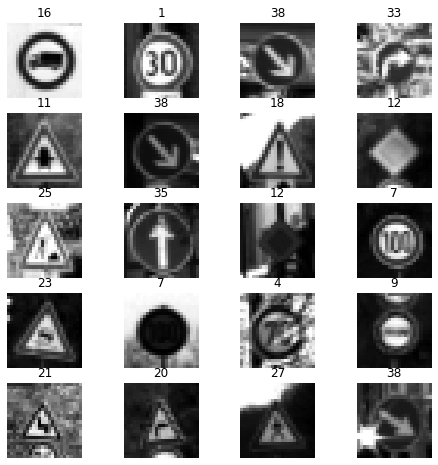

In [6]:
fig = plt.figure(figsize=(8, 8)) 
columns = 4
rows = 5 
print("Test set")
for i in range(1,columns*rows+1): 
    fig.add_subplot(rows, columns, i) 
    plt.imshow(x_test[i-1], cmap='gray')
    plt.title(y_test[i-1])
    plt.axis('off')
plt.show()

Meta set


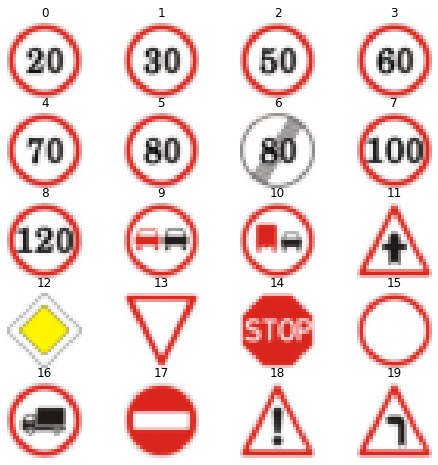

In [7]:
fig = plt.figure(figsize=(8, 8)) 
columns = 4
rows = 5 
print("Meta set")
for i in range(1,columns*rows+1): 
    fig.add_subplot(rows, columns, i) 
    plt.imshow(x_meta[i-1])
    plt.title(y_meta[i-1])
    plt.axis('off')
plt.show()

## Build models

In [8]:
def get_model_v1(lx,ly,lz):
    
    model = keras.models.Sequential()
    
    model.add( keras.layers.Conv2D(96, (3,3), activation='relu', input_shape=(lx,ly,lz)))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(192, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Flatten()) 
    model.add( keras.layers.Dense(1500, activation='relu'))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Dense(43, activation='softmax'))
    return model
    

def get_model_v2(lx,ly,lz):
    model = keras.models.Sequential()

    model.add( keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(lx,ly,lz), activation='relu'))
    model.add( keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add( keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
    model.add( keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(512, activation='relu'))
    model.add( keras.layers.Dropout(0.5))
    model.add( keras.layers.Dense(43, activation='softmax'))
    return model


In [9]:
(n,lx,ly,lz) = x_train.shape
print("Images of the dataset have this folowing shape : ",(lx,ly,lz))

Images of the dataset have this folowing shape :  (24, 24, 1)


In [10]:
model = get_model_v1(lx,ly,lz)

model.summary()

model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 96)        960       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 192)         166080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 192)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 192)         0

2022-08-19 11:09:05.852968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 11:09:06.296113: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-08-19 11:09:06.296152: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9624 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5


In [11]:
#Train
history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/5


2022-08-19 11:09:07.902425: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-19 11:09:08.400327: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


123/123 [==============================] - 3s 9ms/step - loss: 3.0974 - accuracy: 0.1910 - val_loss: 2.0423 - val_accuracy: 0.4252
Epoch 2/5
123/123 [==============================] - 1s 8ms/step - loss: 1.2965 - accuracy: 0.6254 - val_loss: 0.9900 - val_accuracy: 0.7300
Epoch 3/5
123/123 [==============================] - 1s 8ms/step - loss: 0.6711 - accuracy: 0.8016 - val_loss: 0.6397 - val_accuracy: 0.8329
Epoch 4/5
123/123 [==============================] - 1s 8ms/step - loss: 0.4327 - accuracy: 0.8723 - val_loss: 0.5345 - val_accuracy: 0.8690
Epoch 5/5
123/123 [==============================] - 1s 8ms/step - loss: 0.3005 - accuracy: 0.9107 - val_loss: 0.4650 - val_accuracy: 0.8975


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.4650
Test accuracy  : 0.8975


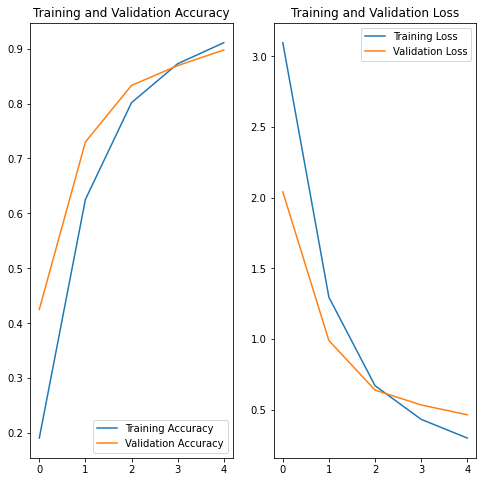

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model with Callback

In [14]:
directory='GTSRB'
model =  directory + '/models'
log   =  directory + '/logs'

os.makedirs(model, mode=0o750, exist_ok=True)
os.makedirs(log, exist_ok=True)


# Callback ModelCheckpoint - Save best model
save_dir = directory + "/models/best-model.h5"
bestmodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=0, monitor='accuracy', save_best_only=True)

# Callback ModelCheckpoint - Save model each epochs
save_dir = directory + "/models/model-{epoch:04d}.h5"
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=0)

In [15]:
model2 = get_model_v2(lx,ly,lz)

model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         147584    
                                                      

In [16]:
# Train

history2 = model2.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=fit_verbosity,
                      validation_data=(x_test, y_test),
                      callbacks=[bestmodel_callback, savemodel_callback] )


Epoch 1/5
123/123 [==============================] - 3s 22ms/step - loss: 3.5432 - accuracy: 0.0524 - val_loss: 3.4118 - val_accuracy: 0.0622
Epoch 2/5
123/123 [==============================] - 2s 16ms/step - loss: 2.7184 - accuracy: 0.2297 - val_loss: 1.6468 - val_accuracy: 0.4877
Epoch 3/5
123/123 [==============================] - 7s 59ms/step - loss: 1.3671 - accuracy: 0.5642 - val_loss: 0.8362 - val_accuracy: 0.7458
Epoch 4/5
123/123 [==============================] - 4s 30ms/step - loss: 0.7555 - accuracy: 0.7544 - val_loss: 0.5479 - val_accuracy: 0.8519
Epoch 5/5
123/123 [==============================] - 4s 37ms/step - loss: 0.4515 - accuracy: 0.8537 - val_loss: 0.3849 - val_accuracy: 0.8967


In [17]:
model2.save(f'{directory}/models/last-model.h5') # save the last model

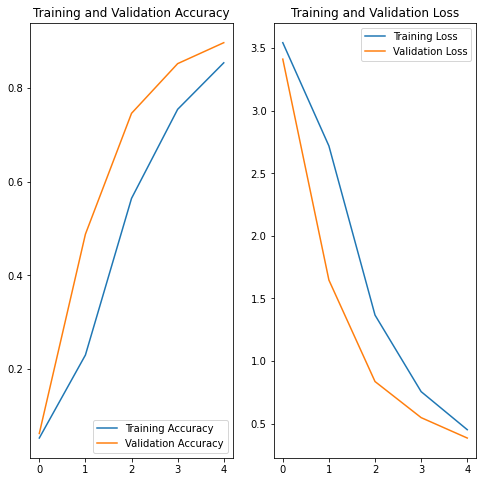

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
loaded_model = tf.keras.models.load_model(f'{directory}/models/best-model.h5')
loaded_model.summary()
print("Loaded.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         147584    
                                                      

In [20]:
score = model2.evaluate (x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')

Test loss: 0.3848894536495209, Test accuracy: 0.8966745734214783


In [21]:
y_sigmoid = model2.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=-1)

79/79 [==============================] - 0s 4ms/step


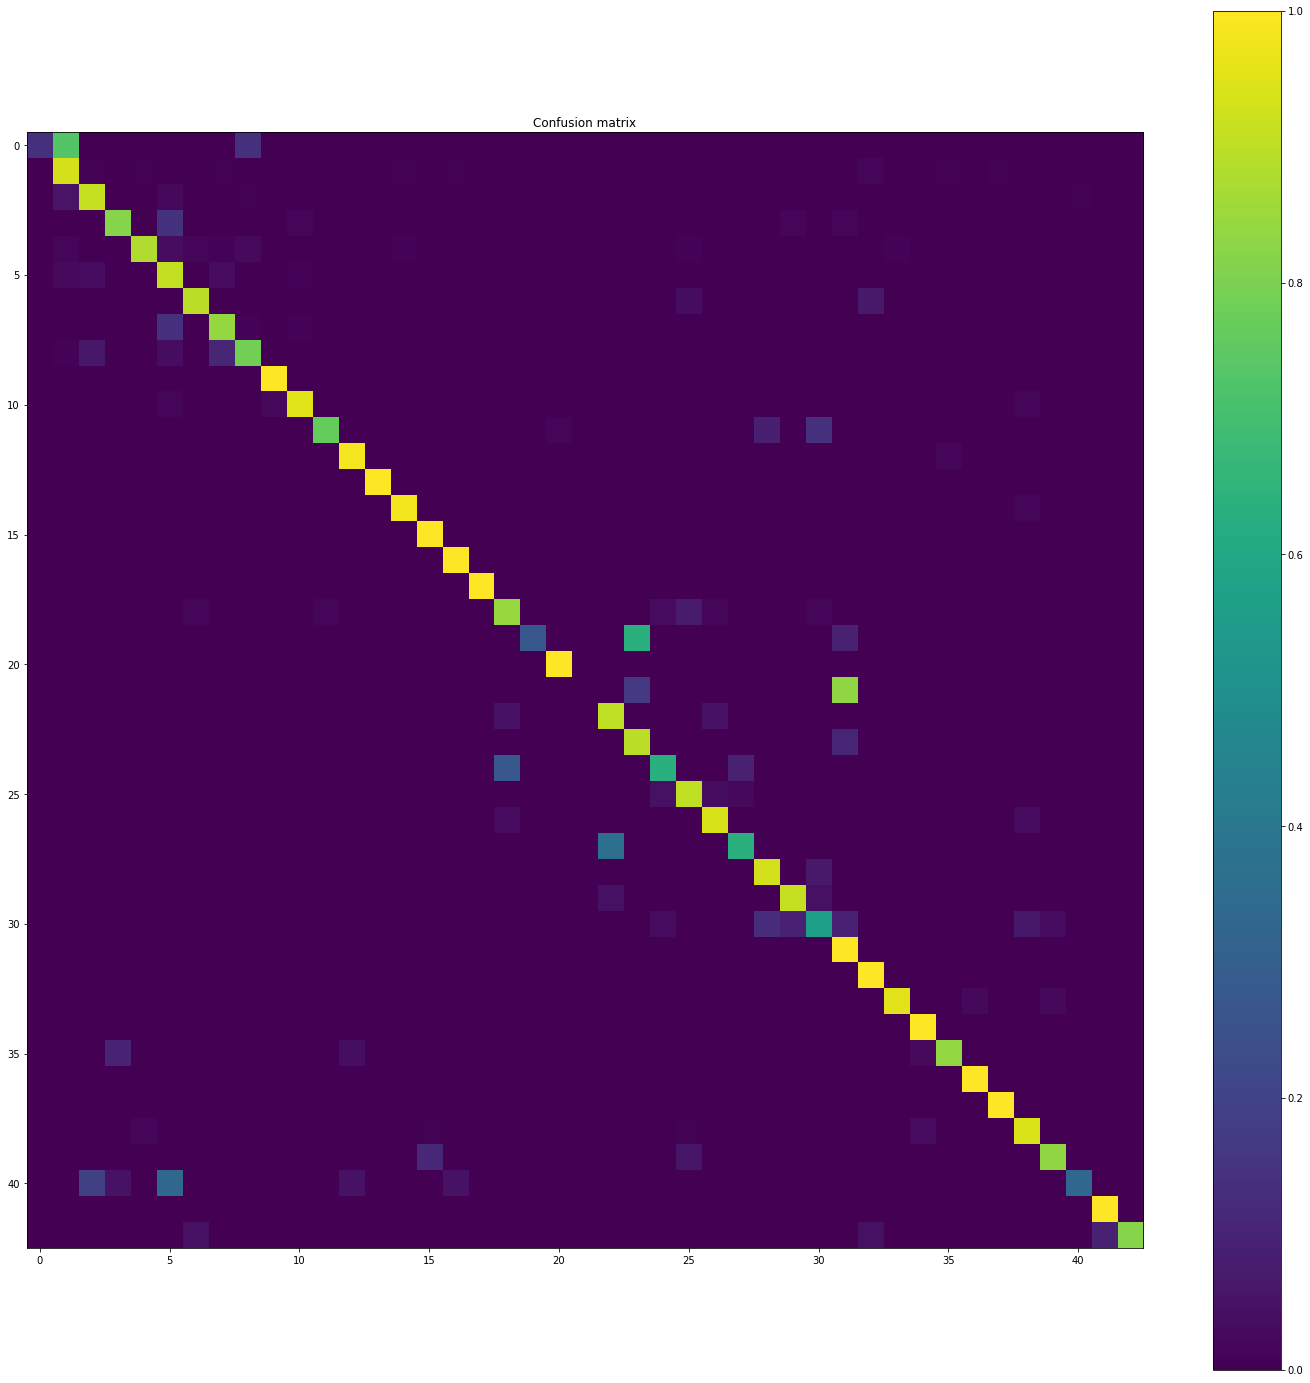

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix( y_test, y_pred, normalize="true")
plt.figure(figsize=(25,25))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion matrix")
plt.colorbar()

1/1 [==============================] - 0s 117ms/step
It's right


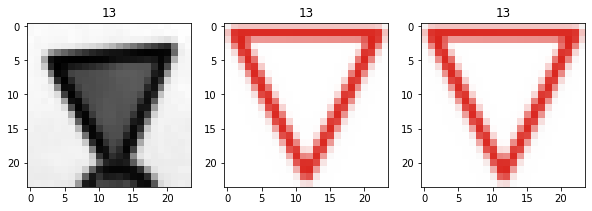

In [23]:
import random

i=random.randint(1,len(x_test))
x,y = x_test[i], y_test[i]


predictions = loaded_model.predict( np.array([x]))
p=np.argmax(predictions)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(x, cmap='gray')
plt.title(p)

plt.subplot(1,3,2)
plt.imshow(x_meta[p])
plt.title(p)

plt.subplot(1,3,3)
plt.imshow(x_meta[y])
plt.title(y)


if y==p:
    print("It's right")
else:
    print("It's wrong")

## data augmentation

In [24]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)
datagen.fit(x_train)

In [25]:
model = get_model_v1(lx,ly,lz)

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 22, 22, 96)        960       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 96)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 96)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 192)         166080    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 192)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 192)        

In [26]:
epochs=35

history = model.fit(  datagen.flow(x_train, y_train, batch_size=batch_size),
                      steps_per_epoch = int(x_train.shape[0]/batch_size),
                      epochs=epochs,
                      verbose=fit_verbosity,
                      validation_data=(x_test, y_test))

Epoch 1/35
122/122 [==============================] - 4s 31ms/step - loss: 3.4168 - accuracy: 0.0923 - val_loss: 3.1477 - val_accuracy: 0.1979
Epoch 2/35
122/122 [==============================] - 4s 31ms/step - loss: 2.6759 - accuracy: 0.2781 - val_loss: 1.7678 - val_accuracy: 0.5048
Epoch 3/35
122/122 [==============================] - 4s 30ms/step - loss: 1.8668 - accuracy: 0.4639 - val_loss: 1.3541 - val_accuracy: 0.6374
Epoch 4/35
122/122 [==============================] - 4s 30ms/step - loss: 1.5036 - accuracy: 0.5575 - val_loss: 1.0283 - val_accuracy: 0.6849
Epoch 5/35
122/122 [==============================] - 4s 31ms/step - loss: 1.2860 - accuracy: 0.6112 - val_loss: 0.8254 - val_accuracy: 0.7573
Epoch 6/35
122/122 [==============================] - 4s 29ms/step - loss: 1.1094 - accuracy: 0.6632 - val_loss: 0.7165 - val_accuracy: 0.7807
Epoch 7/35
122/122 [==============================] - 4s 31ms/step - loss: 0.9794 - accuracy: 0.7044 - val_loss: 0.6369 - val_accuracy: 0.8032

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.2288
Test accuracy  : 0.9442


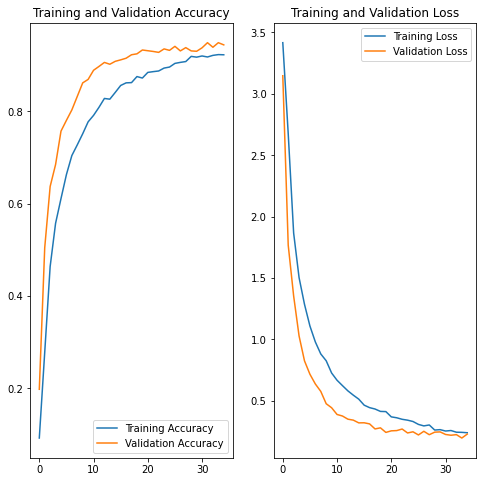

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()